<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_?_link_to_prev_notebook.ipynb" target="_blank"><< PREV NOTEBOOK</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_?_link_to_next_notebook.ipynb" target="_blank">NEXT NOTEBOOK >></a>

<font color="#138D75">**EUMETSAT OSI SAF Training Service**</font> <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h3>Learn OSI SAF sea surface temperature: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
- **COMPLETE WITH ANY PRE-REQUISITES (e.g. account access), IF ANY**

There are no prerequisite notebooks for this module.
- **COMPLETE WITH ANY PRE-REQUISITE NOTEBOOKS, IF ANY**
    
</div>
<hr>

# 1.1 Map Metop MSG SEVIRI SST - Downloaded from IFREMER FTP
### Data used 



### Learning outcomes

At the end of this notebook you will know;
* How to open MSG SEVIRI SST netcdf 
* Map SST using cartopy 

### Outline 

...

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>

 1. [Definining geographical area](#section1)
 1. [Mapping SST](#section2)

<hr>

In [1]:
# library imports 

from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import ssl
import os
import warnings
ssl._create_default_https_context = ssl._create_unverified_context

warnings.filterwarnings('ignore')

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting parameters
[Back to top](#TOC_TOP)

</div>

Setting directory where to read data files

In [2]:
directory = 'meteosat'

Choosing color palet

In [3]:
cmap = mpl_cm.get_cmap('RdYlBu_r')

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Mapping SST
[Back to top](#TOC_TOP)

</div>

Mapping figure based on retrieved MSG SEVIRI SST file

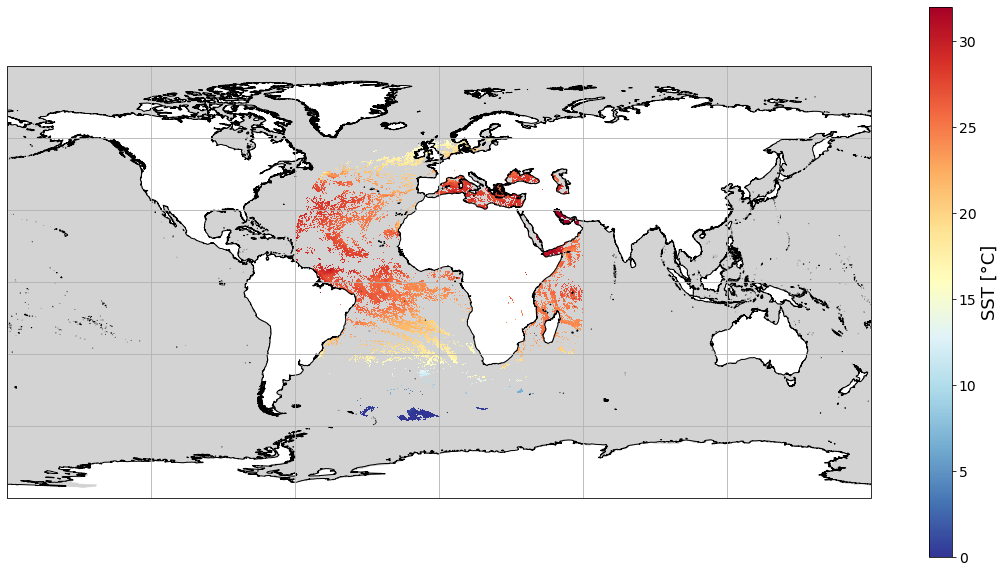

In [4]:
fig = plt.figure(figsize=(16,9))
projection=ccrs.PlateCarree()

ax = plt.axes([0.05,0.05,0.75,0.85], projection=projection)
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='lightgrey')
ax.gridlines()
ax.coastlines('10m')
ax.set_global()

# iterate over files in
# directory
for filename in os.listdir(directory):
    nc = NetCDFFile(directory + '/' + filename)
    lat = nc.variables['lat'][:]    
    lon = nc.variables['lon'][:]
    sst = nc.variables['sea_surface_temperature'][:]
    ql  = nc.variables['quality_level'][:]
    nc.close()
    sst_ql345 = np.ma.masked_where(ql<3, sst)
    ql2345 = np.ma.masked_where(ql<1, ql)
    im = plt.pcolormesh(lon, lat, sst_ql345[0,:,:]-273.15, transform=ccrs.PlateCarree(), cmap=cmap)
    im.set_clim(0,32)

axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('SST [°C]', fontsize=18)
cb.ax.tick_params(labelsize=14)

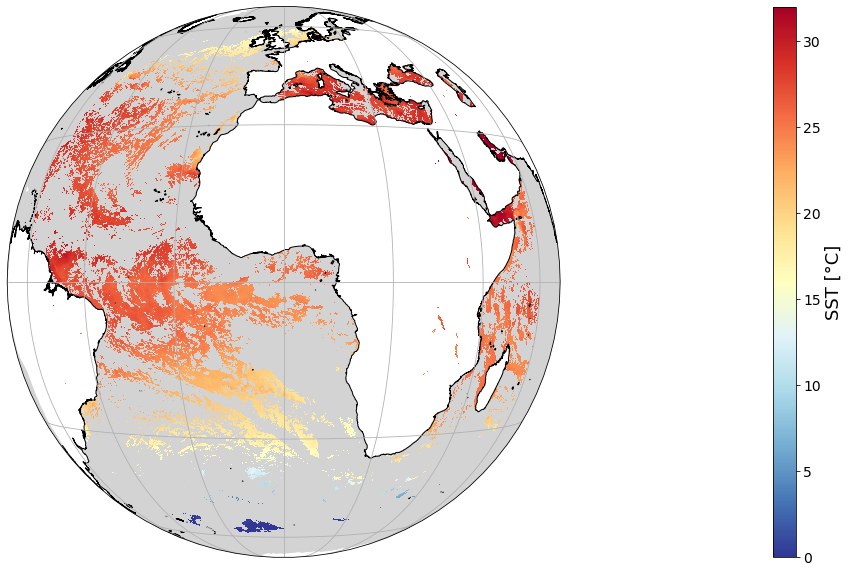

In [6]:
fig = plt.figure(figsize=(16,9))
projection=ccrs.Geostationary(0,)

ax = plt.axes([0.05,0.05,0.75,0.85], projection=projection)
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='lightgrey')
ax.gridlines()
ax.coastlines('10m')
ax.set_global()

# iterate over files in
# directory
for filename in os.listdir(directory):
    nc = NetCDFFile(directory + '/' + filename)
    lat = nc.variables['lat'][:]    
    lon = nc.variables['lon'][:]
    sst = nc.variables['sea_surface_temperature'][:]
    ql  = nc.variables['quality_level'][:]
    nc.close()
    sst_ql345 = np.ma.masked_where(ql<3, sst)
    ql2345 = np.ma.masked_where(ql<1, ql)
    im = plt.pcolormesh(lon, lat, sst_ql345[0,:,:]-273.15, transform=ccrs.PlateCarree(), cmap=cmap)
    im.set_clim(0,32)

axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('SST [°C]', fontsize=18)
cb.ax.tick_params(labelsize=14)

<hr>
<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_?_link_to_prev_notebook.ipynb" target="_blank"><< PREV NOTEBOOK</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_?_link_to_next_notebook.ipynb" target="_blank">NEXT NOTEBOOK >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>